(dancing-in-chains)=
# Dancing in Chains
 
 
<div style="display: flex; justify-content: center;">
    <iframe width="80%" height="400px" src="https://www.youtube.com/embed/rW2GJMI4heI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</div>

```{figure} https://www.ledr.com/colours/white.jpg
---
width: 1
height: 1
---
Given our deep dive into "[nonself](https://www.bu.edu/sph/files/2012/01/Stybel_Friend-Foe-Ally-Adversary.pdf)" and "self" through biological systems, signal detection, and the metaphor of Uganda’s and Africa’s identity, I’d love to ask you: How do you see the interplay of cultural "noise" and "signal" shaping your own perception of Ugandan identity today—particularly in balancing traditional tribal heritage with the modern, global influences that have woven into its fabric? It ties into our exploration of ambiguity and convergence, and I’m curious about your personal lens on this dynamic.
```

 


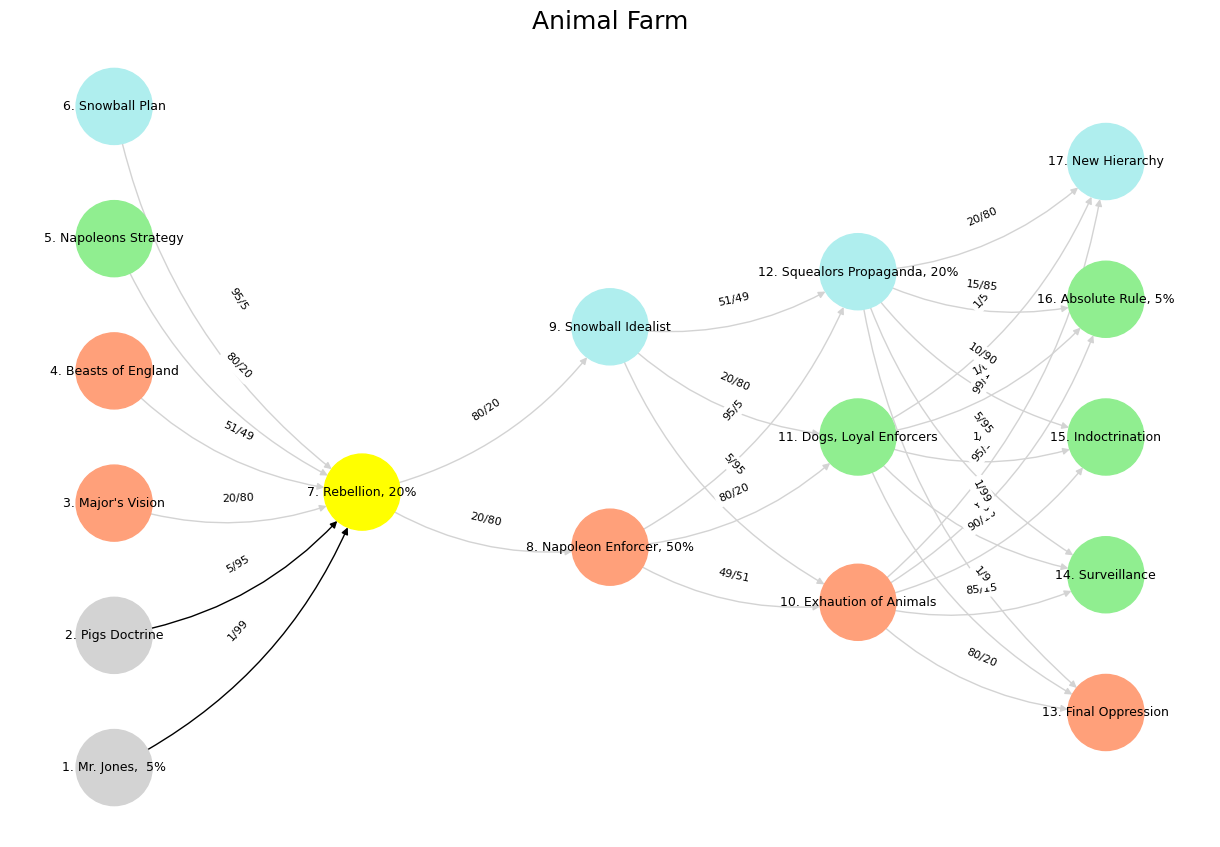

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network layers
def define_layers():
    return {
        'Suis': ['Mr. Jones,  5%', 'Pigs Doctrine', "Major's Vision", 'Beasts of England', "Napoleons Strategy", 'Snowball Plan'],
        'Voir': ['Rebellion, 20%'],  
        'Choisis': ['Napoleon Enforcer, 50%', 'Snowball Idealist'],  
        'Deviens': ['Exhaution of Animals', 'Dogs, Loyal Enforcers', 'Squealors Propaganda, 20%'],  
        "M'èléve": ['Final Oppression', 'Surveillance', 'Indoctrination', 'Absolute Rule, 5%', 'New Hierarchy']  
    }

# Assign colors to nodes
def assign_colors():
    color_map = {
        'yellow': ['Rebellion, 20%'],  
        'paleturquoise': ['Snowball Plan', 'Snowball Idealist', 'Squealors Propaganda, 20%', 'New Hierarchy'],  
        'lightgreen': ["Napoleons Strategy", 'Dogs, Loyal Enforcers', 'Surveillance', 'Absolute Rule, 5%', 'Indoctrination'],  
        'lightsalmon': ["Major's Vision", 'Beasts of England', 'Napoleon Enforcer, 50%', 'Exhaution of Animals', 'Final Oppression'],
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Define edge weights
def define_edges():
    return {
        ('Mr. Jones,  5%', 'Rebellion, 20%'): '1/99',
        ('Pigs Doctrine', 'Rebellion, 20%'): '5/95',
        ("Major's Vision", 'Rebellion, 20%'): '20/80',
        ('Beasts of England', 'Rebellion, 20%'): '51/49',
        ("Napoleons Strategy", 'Rebellion, 20%'): '80/20',
        ('Snowball Plan', 'Rebellion, 20%'): '95/5',
        ('Rebellion, 20%', 'Napoleon Enforcer, 50%'): '20/80',
        ('Rebellion, 20%', 'Snowball Idealist'): '80/20',
        ('Napoleon Enforcer, 50%', 'Exhaution of Animals'): '49/51',
        ('Napoleon Enforcer, 50%', 'Dogs, Loyal Enforcers'): '80/20',
        ('Napoleon Enforcer, 50%', 'Squealors Propaganda, 20%'): '95/5',
        ('Snowball Idealist', 'Exhaution of Animals'): '5/95',
        ('Snowball Idealist', 'Dogs, Loyal Enforcers'): '20/80',
        ('Snowball Idealist', 'Squealors Propaganda, 20%'): '51/49',
        ('Exhaution of Animals', 'Final Oppression'): '80/20',
        ('Exhaution of Animals', 'Surveillance'): '85/15',
        ('Exhaution of Animals', 'Indoctrination'): '90/10',
        ('Exhaution of Animals', 'Absolute Rule, 5%'): '95/5',
        ('Exhaution of Animals', 'New Hierarchy'): '99/1',
        ('Dogs, Loyal Enforcers', 'Final Oppression'): '1/9',
        ('Dogs, Loyal Enforcers', 'Surveillance'): '1/8',
        ('Dogs, Loyal Enforcers', 'Indoctrination'): '1/7',
        ('Dogs, Loyal Enforcers', 'Absolute Rule, 5%'): '1/6',
        ('Dogs, Loyal Enforcers', 'New Hierarchy'): '1/5',
        ('Squealors Propaganda, 20%', 'Final Oppression'): '1/99',
        ('Squealors Propaganda, 20%', 'Surveillance'): '5/95',
        ('Squealors Propaganda, 20%', 'Indoctrination'): '10/90',
        ('Squealors Propaganda, 20%', 'Absolute Rule, 5%'): '15/85',
        ('Squealors Propaganda, 20%', 'New Hierarchy'): '20/80'
    }

# Define edges to be highlighted in black
def define_black_edges():
    return {
        ('Mr. Jones,  5%', 'Rebellion, 20%'): '1/99',
        ('Pigs Doctrine', 'Rebellion, 20%'): '5/95',
    }

# Calculate node positions
def calculate_positions(layer, x_offset):
    y_positions = np.linspace(-len(layer) / 2, len(layer) / 2, len(layer))
    return [(x_offset, y) for y in y_positions]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    edges = define_edges()
    black_edges = define_black_edges()
    
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    
    # Create mapping from original node names to numbered labels
    mapping = {}
    counter = 1
    for layer in layers.values():
        for node in layer:
            mapping[node] = f"{counter}. {node}"
            counter += 1
            
    # Add nodes with new numbered labels and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        positions = calculate_positions(nodes, x_offset=i * 2)
        for node, position in zip(nodes, positions):
            new_node = mapping[node]
            G.add_node(new_node, layer=layer_name)
            pos[new_node] = position
            node_colors.append(colors.get(node, 'lightgray'))
    
    # Add edges with updated node labels
    edge_colors = []
    for (source, target), weight in edges.items():
        if source in mapping and target in mapping:
            new_source = mapping[source]
            new_target = mapping[target]
            G.add_edge(new_source, new_target, weight=weight)
            edge_colors.append('black' if (source, target) in black_edges else 'lightgrey')
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    edges_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
    
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors,
        node_size=3000, font_size=9, connectionstyle="arc3,rad=0.2"
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edges_labels, font_size=8)
    plt.title("Animal Farm", fontsize=18)
    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
_[Chapter X](https://gutenberg.net.au/ebooks01/0100011h.html#ch2)_. Years passed. The seasons came and went, the short animal lives fled by. A time came when there was no one who remembered the old days before the Rebellion, except Clover, Benjamin, Moses the raven, and a number of the pigs.Muriel was dead; Bluebell, Jessie, and Pincher were dead. Jones too was dead—he had died in an inebriates' home in another part of the country. Snowball was forgotten. Boxer was forgotten, except by the few who had known him. Clover was an old stout mare now, stiff in the joints and with a tendency to rheumy eyes. She was two years past the retiring age, but in fact no animal had ever actually retired. The talk of setting aside a corner of the pasture for superannuated animals had long since been dropped. Napoleon was now a mature boar of twenty-four stone. Squealer was so fat that he could with difficulty see out of his eyes. Only old Benjamin was much the same as ever, except for being a little greyer about the muzzle, and, since Boxer's death, more morose and taciturn than ever.
```
      

 

#
